In [65]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

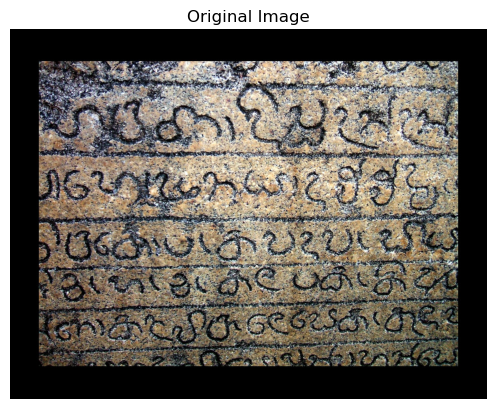

In [135]:
original_image = cv2.imread('image_1.jpg')

plt.imshow(cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')
plt.show()

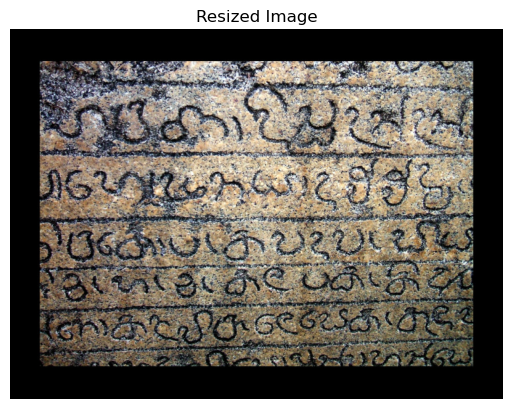

In [136]:
width, height = 800, 600
resized_image = cv2.resize(original_image, (width, height), interpolation=cv2.INTER_AREA)

plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('Resized Image')
plt.axis('off')
plt.show()

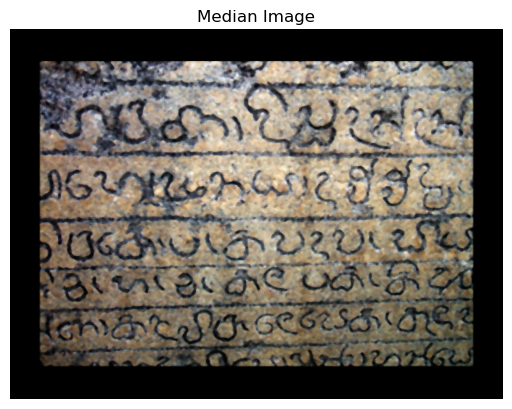

In [137]:
median_image = cv2.medianBlur(resized_image, 5)

plt.imshow(cv2.cvtColor(median_image, cv2.COLOR_BGR2RGB))
plt.title('Median Image')
plt.axis('off')
plt.show()

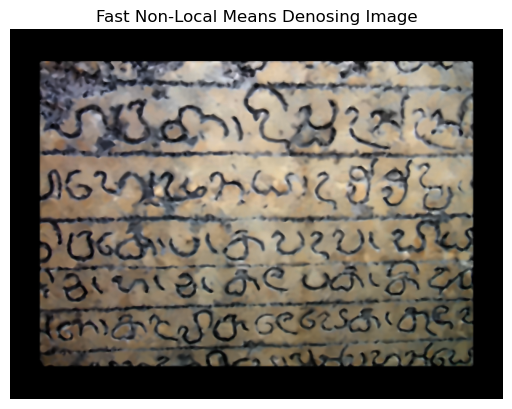

In [139]:
# denoising
denoised_image = cv2.fastNlMeansDenoisingColored(median_image, None, h=10, templateWindowSize=7, searchWindowSize=21)

plt.imshow(cv2.cvtColor(denoised_image, cv2.COLOR_BGR2RGB))
plt.title('Fast Non-Local Means Denosing Image')
plt.axis('off')
plt.show()

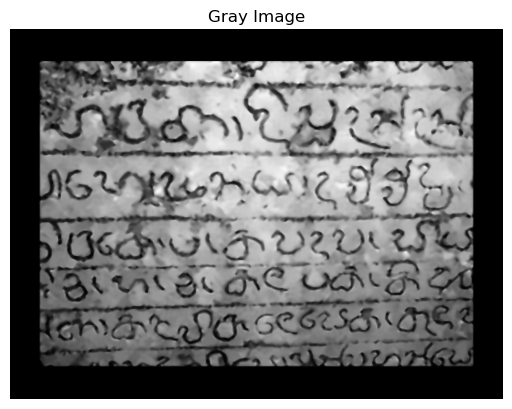

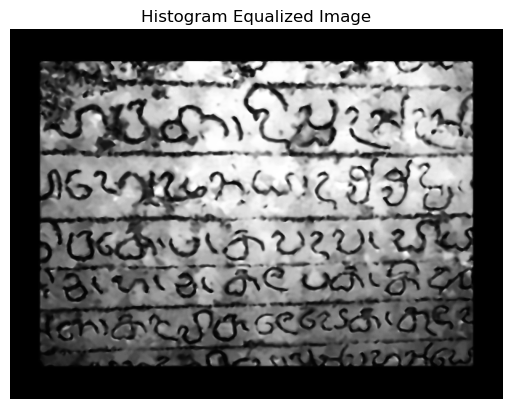

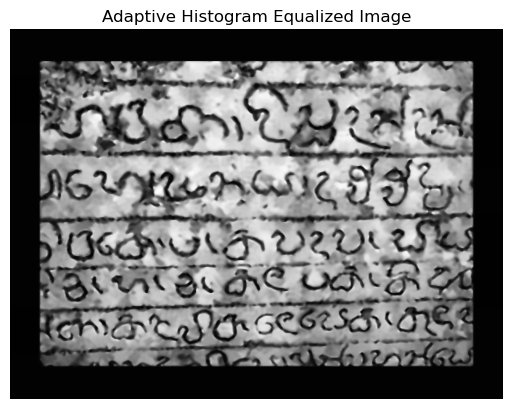

In [140]:
# histogram equalization
gray_image = cv2.cvtColor(denoised_image, cv2.COLOR_BGR2GRAY)
equalized_image = cv2.equalizeHist(gray_image)

clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8))
aequalized_image = clahe.apply(gray_image)

plt.imshow(gray_image, cmap='gray')
plt.title('Gray Image')
plt.axis('off')
plt.show()

plt.imshow(equalized_image, cmap='gray')
plt.title('Histogram Equalized Image')
plt.axis('off')
plt.show()

plt.imshow(aequalized_image, cmap='gray')
plt.title('Adaptive Histogram Equalized Image')
plt.axis('off')
plt.show()


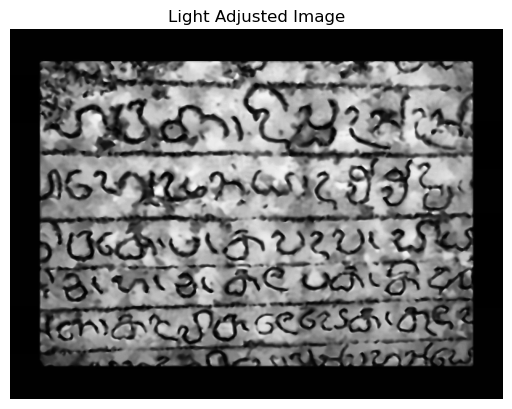

In [141]:
# Assuming gamma correction for contrast adjustment
gamma = 1.2
adjusted_image = np.clip((aequalized_image / 255.0) ** gamma * 255.0, 0, 255).astype(np.uint8)

plt.imshow(adjusted_image, cmap='gray')
plt.title('Light Adjusted Image')
plt.axis('off')
plt.show()

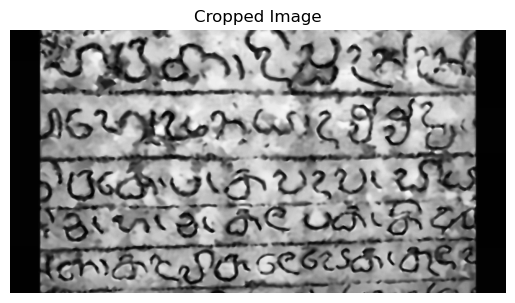

In [142]:
# Define coordinates of the region of interest (ROI)
x, y, w, h = 0, 100, 800, 425
cropped_image = aequalized_image[y:y+h, x:x+w]

plt.imshow(cropped_image, cmap='gray')
plt.title('Cropped Image')
plt.axis('off')
plt.show()

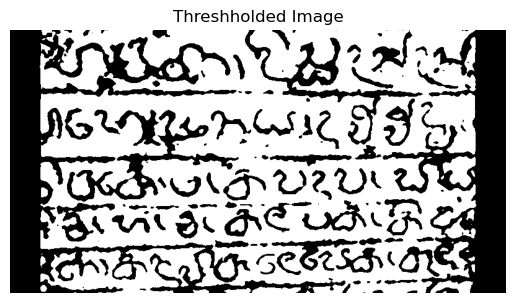

In [145]:
# Apply adaptive thresholding
_, thresholded_image = cv2.threshold(cropped_image, 50, 200, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Display the thresholded image
plt.imshow(thresholded_image, cmap='gray')
plt.title('Threshholded Image')
plt.axis('off')
plt.show()

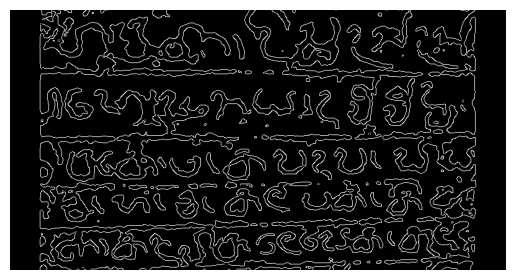

In [116]:
edges = cv2.Canny(thresholded_image, 50, 150)

plt.imshow(edges, cmap='gray')
plt.title('Edge Image')
plt.axis('off')
plt.show()

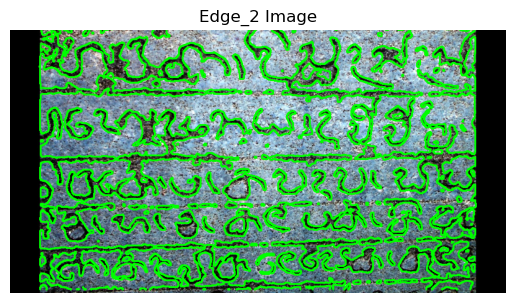

In [144]:
# Find contours in the edges
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw the contours on a copy of the original image
segmented_image = resized_image[y:y+h, x:x+w].copy()
cv2.drawContours(segmented_image, contours, -1, (0, 255, 0), 2)

plt.imshow(segmented_image)
plt.title('Edge_2 Image')
plt.axis('off')
plt.show()

## Auto Extraction

In [119]:
import os

# create a directory to save the cropped letters
output_dir = "C:/Users/User/Desktop/Image Processing/auto_extraction"
os.makedirs(output_dir, exist_ok=True)

for i, contour in enumerate(contours):
    x, y, w, h = cv2.boundingRect(contour)

    # Ensure the contour is not too small (adjust this threshold based on your needs)
    if w > 20 and h > 20:
        # Exclude contours with a specific aspect ratio (e.g., long lines)
        aspect_ratio = w / h
        aspect_ratio_threshold = 5  # Adjust this threshold based on your needs

        if aspect_ratio < aspect_ratio_threshold:
            # Crop the letter from the original image
            letter = thresholded_image[y:y + h, x:x + w]

            # Save the cropped letter as a PNG file
            letter_filename = os.path.join(output_dir, f"letter_{i}.png")
            cv2.imwrite(letter_filename, letter)

## Manual Extraction

In [150]:
import cv2
import numpy as np

# Assuming 'edges' is the edge-detected image from the previous step

# Create a copy of the edge image for visualization purposes
edge_visualization = cropped_image

# Initialize empty list to store extracted characters
extracted_characters = []

# Create a named window for interactive selection
cv2.namedWindow('Manual Character Extraction')

# Mouse callback function for interactive selection
def mouse_callback(event, x, y, flags, param):
    global drawing, ix, iy, roi_points

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
        roi_points = [(x, y)]

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        roi_points.append((x, y))

        # Draw a rectangle around the selected region
        cv2.rectangle(edge_visualization, (ix, iy), (x, y), (0, 255, 0), 2)
        cv2.imshow('Manual Character Extraction', edge_visualization)

        # Extract the character within the selected region from the edge-detected image
        extracted_character = resized_image[iy:y, ix:x]
        extracted_characters.append(extracted_character)

# Set up the mouse callback
cv2.setMouseCallback('Manual Character Extraction', mouse_callback)

# Main loop for interactive selection
drawing, ix, iy, roi_points = False, -1, -1, []

while True:
    cv2.imshow('Manual Character Extraction', edge_visualization)
    key = cv2.waitKey(1) & 0xFF

    # Press 'ESC' to exit the interactive selection
    if key == 27:
        break

# Convert the list of extracted characters to a NumPy array
extracted_characters = np.array(extracted_characters)

# Save extracted characters for future use
for i, character in enumerate(extracted_characters):
    cv2.imwrite(f'extracted_character_{i + 1}.png', character)

# Release resources
cv2.destroyAllWindows()


C:\Users\User\AppData\Local\Temp\ipykernel_6720\2730406986.py:51: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  extracted_characters = np.array(extracted_characters)


In [152]:
import cv2
import numpy as np
import os


# Create a copy of the edge image for visualization purposes
edge_visualization = cv2.cvtColor(edges, cv2.COLOR_GRAY2BGR)

# Initialize empty list to store extracted characters
extracted_characters = []

# Create a named window for interactive selection
cv2.namedWindow('Manual Character Extraction')

# Mouse callback function for interactive selection
def mouse_callback(event, x, y, flags, param):
    global drawing, ix, iy, roi_points

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
        roi_points = [(x, y)]

    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        roi_points.append((x, y))

        # Draw a rectangle around the selected region
        cv2.rectangle(edge_visualization, (ix, iy), (x, y), (0, 255, 0), 2)
        cv2.imshow('Manual Character Extraction', edge_visualization)

        # Convert coordinates to match the resized image
        ix_resized, iy_resized = int(ix * (resized_image.shape[1] / edges.shape[1])), int(iy * (resized_image.shape[0] / edges.shape[0]))
        x_resized, y_resized = int(x * (resized_image.shape[1] / edges.shape[1])), int(y * (resized_image.shape[0] / edges.shape[0]))

        # Extract the character within the selected region from the resized image
        extracted_character = resized_image[iy_resized:y_resized, ix_resized:x_resized]
        extracted_characters.append(extracted_character)

# Set up the mouse callback
cv2.setMouseCallback('Manual Character Extraction', mouse_callback)

# Main loop for interactive selection
drawing, ix, iy, roi_points = False, -1, -1, []

while True:
    cv2.imshow('Manual Character Extraction', edge_visualization)
    key = cv2.waitKey(1) & 0xFF

    # Press 'ESC' to exit the interactive selection
    if key == 27:
        break

# Convert the list of extracted characters to a NumPy array
extracted_characters = np.array(extracted_characters)

# Save extracted characters for future use
for i, character in enumerate(extracted_characters):
    cv2.imwrite(f'extracted_character_{i + 1}.png', character)

# Release resources
cv2.destroyAllWindows()


C:\Users\User\AppData\Local\Temp\ipykernel_6720\2238020047.py:55: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  extracted_characters = np.array(extracted_characters)


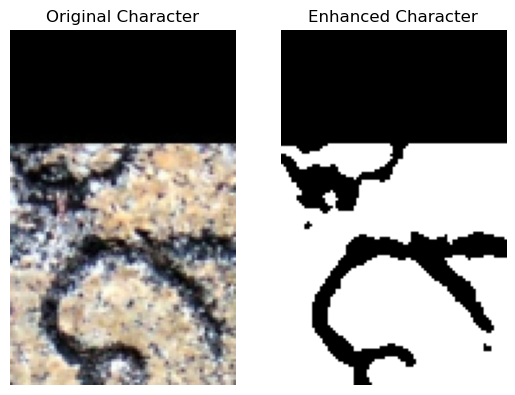

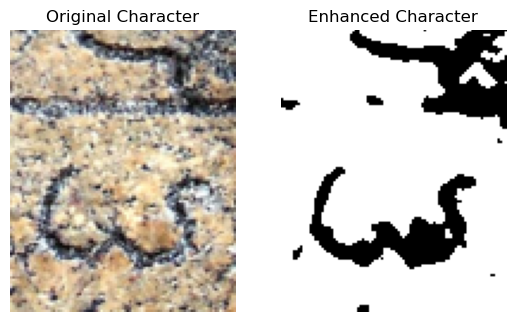

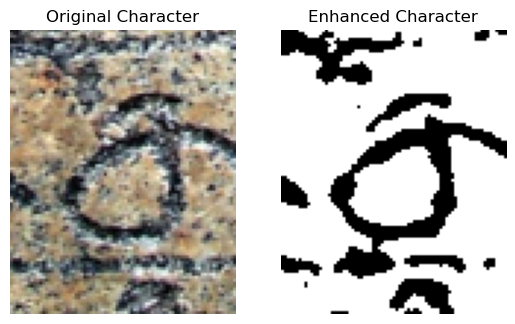

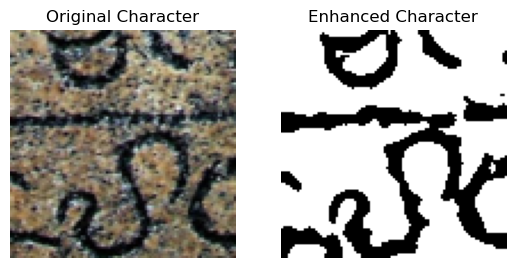

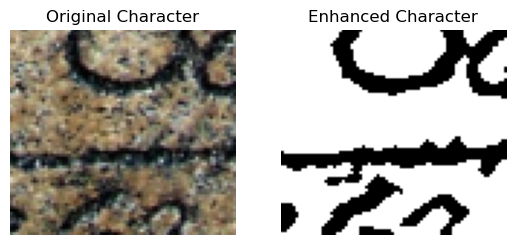

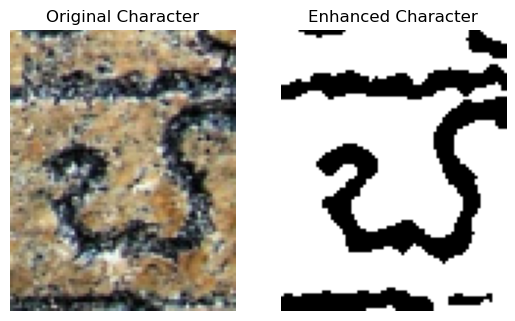

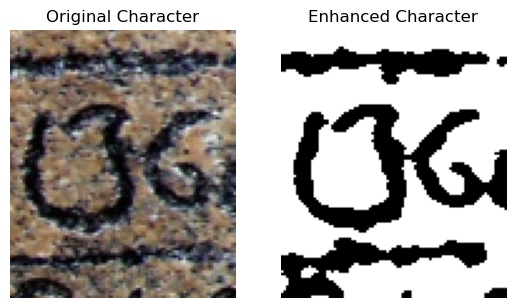

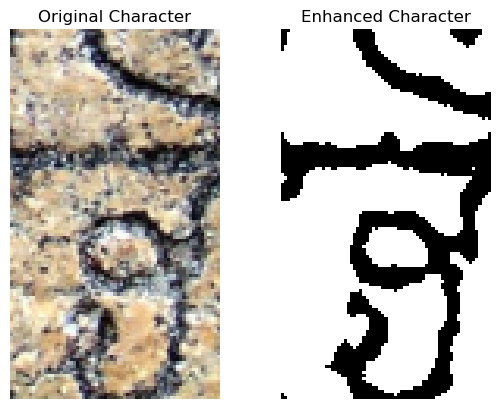

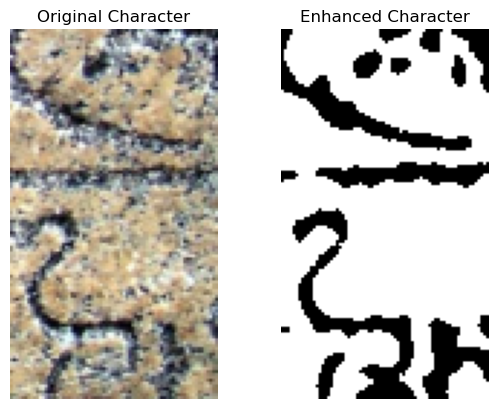

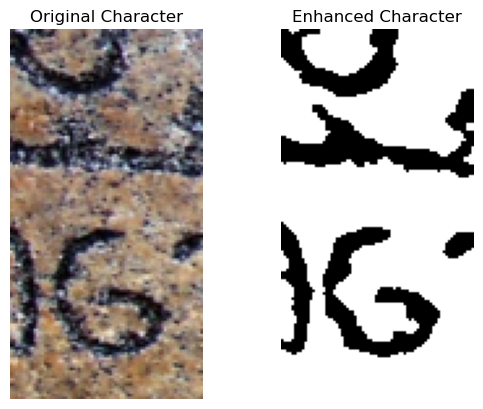

In [153]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


# create a directory to save the cropped letters
output_dir = "C:/Users/User/Desktop/Image Processing/manual_extraction"
os.makedirs(output_dir, exist_ok=True)

# Function for character enhancement
def enhance_characters(characters):
    enhanced_characters = []

    for character in characters:
        denoised_image = cv2.fastNlMeansDenoisingColored(character, None, h=15, hColor=10, templateWindowSize=7, searchWindowSize=21)
        median_image = cv2.medianBlur(denoised_image, 5)
        gray_image = cv2.cvtColor(median_image, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit = 2.0, tileGridSize=(8, 8))
        aequalized_image = clahe.apply(gray_image)
        _, binary_image = cv2.threshold(aequalized_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

        enhanced_characters.append(binary_image)

    return enhanced_characters

# Enhance the extracted characters
enhanced_characters = enhance_characters(extracted_characters)

# Display the original and enhanced characters side by side
for i in range(len(extracted_characters)):
    plt.subplot(1, 2, 1), plt.imshow(cv2.cvtColor(extracted_characters[i], cv2.COLOR_BGR2RGB))
    plt.title('Original Character'), plt.axis('off')

    plt.subplot(1, 2, 2), plt.imshow(enhanced_characters[i], cmap='gray')
    plt.title('Enhanced Character'), plt.axis('off')
    
    # Save the cropped letter as a PNG file
    letter_filename = os.path.join(output_dir, f"letter_{i}.png")
    cv2.imwrite(letter_filename, enhanced_characters[i])

    plt.show()
